In [15]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np


(array([4995., 4962., 4999., 5034., 5123., 5036., 5041., 4959., 5042.,
        5131., 5000., 4982., 4974., 4971., 4934., 4929., 4996., 5030.,
        4960., 4902.]),
 array([1.15451548e-06, 5.00005639e-02, 9.99999732e-02, 1.49999383e-01,
        1.99998792e-01, 2.49998201e-01, 2.99997611e-01, 3.49997020e-01,
        3.99996429e-01, 4.49995839e-01, 4.99995248e-01, 5.49994657e-01,
        5.99994067e-01, 6.49993476e-01, 6.99992885e-01, 7.49992295e-01,
        7.99991704e-01, 8.49991113e-01, 8.99990523e-01, 9.49989932e-01,
        9.99989341e-01]),
 <BarContainer object of 20 artists>)

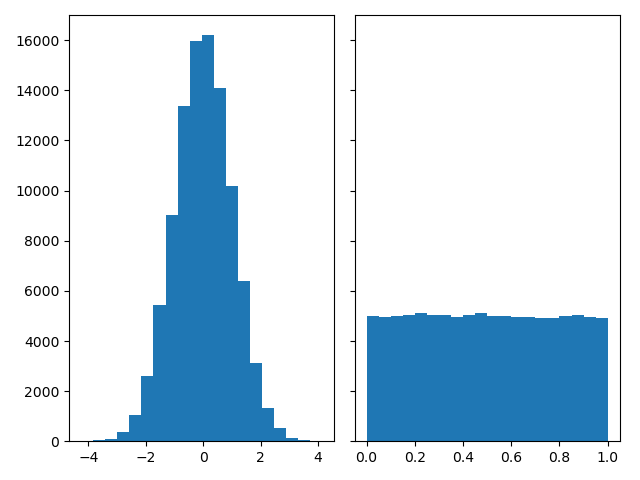

In [16]:
rng = np.random.default_rng()
N_points = 100000
n_bins = 20

# Generate two normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points) + 5
dist2 = rng.uniform(low=0,high=1,size=N_points)

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)


[0.  0.5 1. ] [0.25 0.75 1.25]


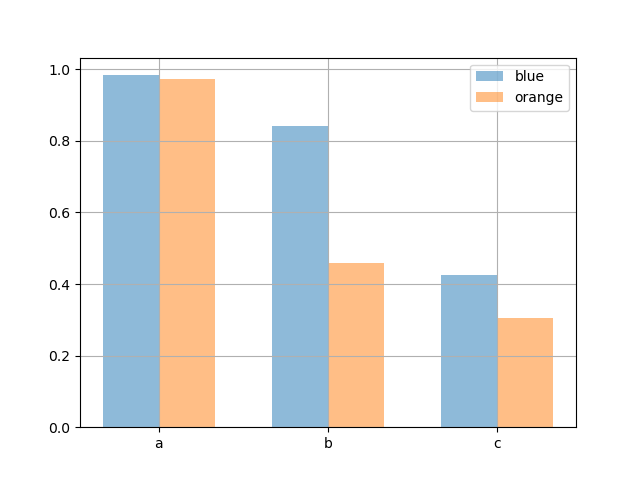

In [17]:
n = 3
X = np.linspace(0,1,n)
width = 1/n/2
print(X, X+1/(n+1))
Y = rng.uniform(size=n)
fig, ax = plt.subplots()
ax.bar(X,rng.uniform(size=n),width=width,alpha=0.5,label='blue')
ax.bar(X+1/n/2,rng.uniform(size=n),width=width,alpha=0.5,label='orange')
ax.set_xticks(X+1/n/4,['a','b','c'])
ax.legend()
ax.grid()
# ax.scatter(X,Y)

In [90]:
plt.close()

In [18]:
def f(x):
    if x == 0:
        res = 1
    else:
        res = np.sin(np.pi*x)/np.pi/x
    return res
def fp(x):
    if x == 0:
        res = 0
    else:
        res = (np.pi**2*x*np.cos(np.pi*x) - np.pi*np.sin(np.pi*x)) / np.pi**2 / x**2
    return(res)
fVect = np.vectorize(f)

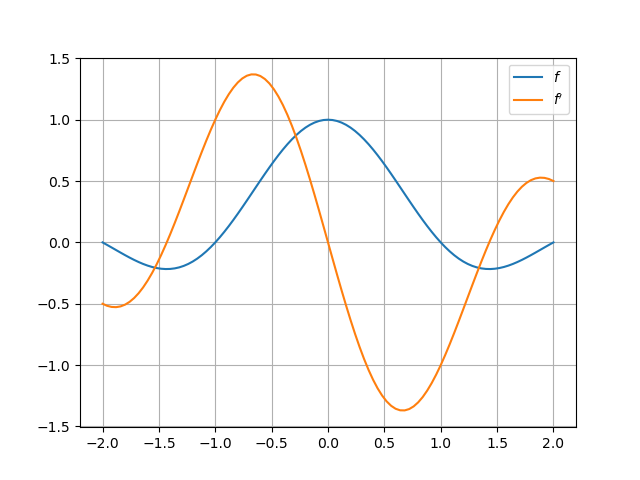

In [19]:
fig, ax = plt.subplots()
n = 101
X = np.linspace(-2,2,n)
Y1 = [f(x) for x in X]
Y2 = fVect(X)
# print(Y1)
# print(Y2)
# print(Y1-Y2)
ax.plot(X, [f(x) for x in X],label = r'$f$')
ax.plot(X, [fp(x) for x in X],label = r"$f'$")
ax.legend()
ax.grid()

In [159]:
# def f(x):
#     return x**2-2
# def fp(x):
#     return 2*x
def Newton(f,fprime,x0,tol):
    x = [x0]
    res = tol+1
    while abs(res) > tol:
        x.append(x[-1] - f(x[-1])/fprime(x[-1]))
        res = f(x[-1])
    return x


In [168]:
x = Newton(f,fp,0.05,1.e-3)  
print(x)

[0.05, np.float64(6.119263961082808), np.float64(5.991472674284945), np.float64(5.999989915513524)]


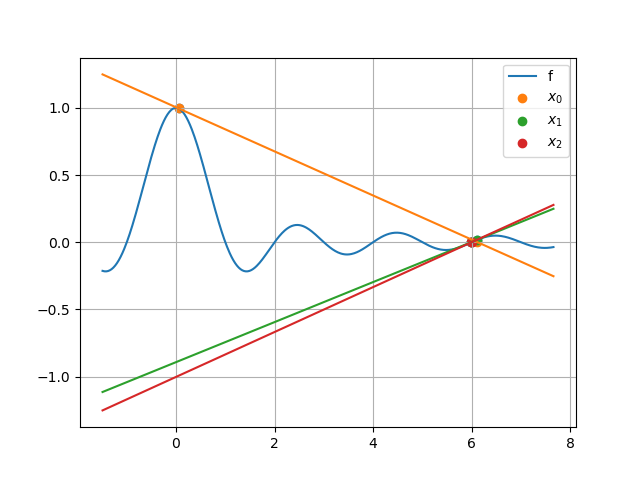

In [169]:
fig, ax = plt.subplots()
a = min(x)
b = max(x)
X = np.linspace(a - (a+b)/4, b + (a+b)/4, 501)
ax.plot(X,[f(x) for x in X],label = 'f')
ax.scatter(x,[f(xx) for xx in x])
for i,x0 in enumerate(x[:-1]):
    ax.plot(X, f(x0) + fp(x0)*(X-x0))
    ax.scatter([x0,x[i+1]], [f(x0),0], label = f'$x_{i}$')
ax.grid()
ax.legend()

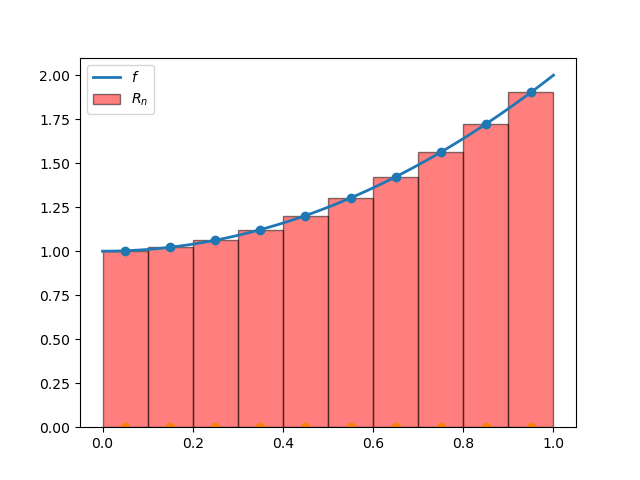

In [14]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
## Rieman summs
def f(x):
    return 1+x**2

fig, ax = plt.subplots()
n = 101
X = np.linspace(0,1,n)
ax.plot(X,f(X),lw=2,label='$f$')

ni = 11
Xi = np.linspace(0,1,ni)
Xis = (Xi[:-1]+Xi[1:])/2
ax.bar(Xi[:-1],f(Xis),width = 1/(ni-1),alpha=0.5,label = '$R_n$', align='edge',edgecolor='k',color='r')
ax.scatter(Xis,f(Xis))
ax.scatter(Xis,np.zeros(np.shape(Xis)))

ax.legend()


In [31]:
plt.close('all')

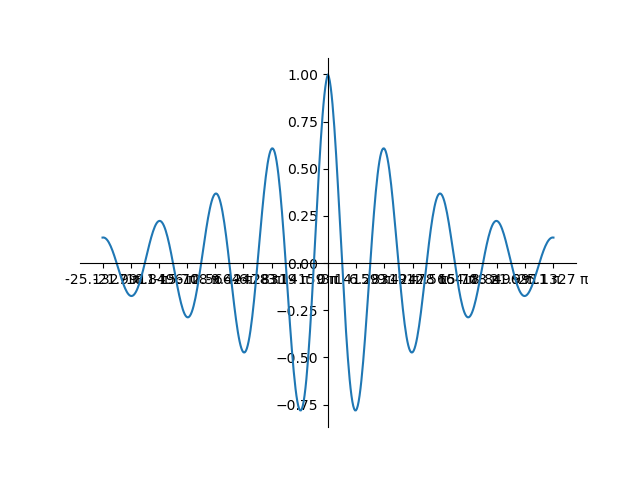

In [52]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()
X = np.linspace(-8*np.pi, 8*np.pi, 501)
plt.plot(X, np.cos(X) * np.exp(-abs(X)/np.pi/4))
ax.spines[['left', 'bottom']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)
# ax.xaxis.set_major_locator(plt.MultipleLocator(2*np.pi))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 2))
# ax.xaxis.set_major_formatter('${x:1.2f}π')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g π'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
# ax.yaxis.set_major_formatter('${x:1.2f}')
# help(ax.xaxis.set_major_formatter('f.1')

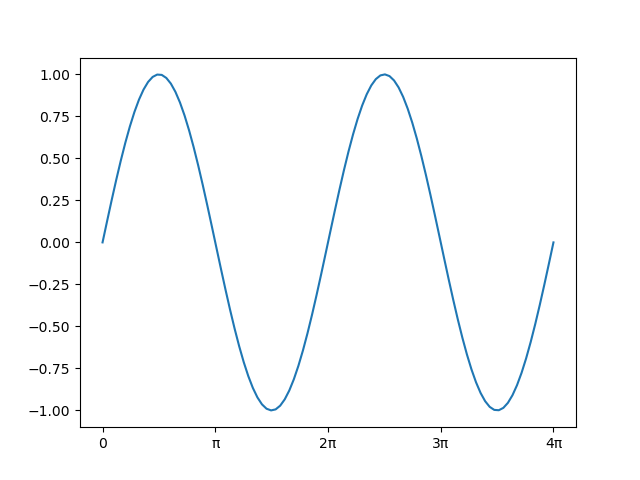

In [68]:
def tickformatter(x,pos=None):
    tol = 1e-8
    if abs(x) < 1e-8:
        return '0'
    n = x/np.pi
    if abs(n - int(n)) < tol:
        # x/π is an int
        if n == 1:
            return 'π'
        elif n == -1:
            return '-π'
        else:
            return f'{int(n):d}π'
    else:
        return f'{x/np.pi:f1.2}π'

import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
import numpy as np
x = np.linspace(0, 4 * np.pi, 100)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g π'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
ax.xaxis.set_major_formatter(tickformatter)
# print(ax.get_xticks())
# xticks = ax.get_xticks()
# xlabels = [tickformatter(x) for x in xticks]
# ax.set_xticks(xticks, labels=xlabels)


        

In [76]:
def tickformatter(x,scale,label,pos=None):
    tol = 1e-8
    if abs(x) < 1e-8:
        return '0'
    n = x/scale
    if abs(n - int(n)) < tol:
        # x/π is an int
        if n == 1:
            return f'{label}'
        elif n == -1:
            return f'-{label}'
        else:
            return f'{int(n):d}{label}'
    else:
        return f'{x/scale}{label}'
scale = np.pi
label = 'π'
X = np.linspace(-2*np.pi, 2*np.pi,5)
print(X)
print([tickformatter(x,scale,label) for x in X])
X = np.linspace(-2*np.pi, 2*np.pi,9)
print([tickformatter(x,np.pi/2,'π/2') for x in X])

[-6.28318531 -3.14159265  0.          3.14159265  6.28318531]
['-2π', '-π', '0', 'π', '2π']
['-4π/2', '-3π/2', '-2π/2', '-π/2', '0', 'π/2', '2π/2', '3π/2', '4π/2']


In [80]:
x = np.pi/2
print(f'{x/np.pi:1.2f}π')

0.50π
